# Проект: Исследование рынка видеоигр

## Описание проекта

Имеется онлайн-магазин видеоигр, ведущий продажи по всему миру. Данному магазину нужно продумать стратегию продаж, чтобы сфокусироваться на наиболее популярном продукте. В нашем распоряженни исторические данные (games.csv) из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


## Описание данных
Таблица games.csv содержит следующие данные:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План проекта
- Шаг 1. Открыть файл с данными и изучить общую информацию
- Шаг 2. Подготовить данные
- Шаг 3. Провести исследовательский анализ данных
- Шаг 4. Составьте портрет пользователя каждого региона
- Шаг 5. Проверьте гипотезы
- Шаг 6. Сформулировать общий вывод

### Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


При первом знакомстве с источником можно говороить:
- всего 16715 строк; 
- пропущено 2 названия игры по столбцу name;
- пропущен значения в годе релиза (year_of_release), также выявлен некорректный тип данных - нужно перевести в целочисленные;
- пропущеные 2 жанра по столбцу genre;
- c данными по продажам проблем нет;
- пропущены значения в столбце с оценками критиков (critic_score);
- пропущены значения в столбце с оценками пользователей (user_score), тип данных не соответствует содержимому - необходимо с типа данных объект изменить на тип данных числовой;
- пропущены значения в столбце с рейтинго ESRB;

Для удобства, сохраним исходные заголовки

In [2]:
old_columns = games.columns
print(old_columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


### Шаг 2. Подготовить данные

Приведем к нижнему регистру название столбцов

In [3]:
new_columns = []
for i in range (0, len(old_columns)):
    new_columns.append(old_columns[i].lower())

In [4]:
games.columns = new_columns
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
print(games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

Ознакомимься со столбцов name

In [6]:
print(games[games['name'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Удалим 2 строки

In [7]:
games.dropna(inplace=True, subset=['name'])
games = games.reset_index(drop=True)
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Проанализируем пропуски в годах

In [8]:
print('Доля пропусков в годах от общего кол-ва записей:', len(games[games['year_of_release'].isna()])/len(games))

Доля пропусков в годах от общего кол-ва записей: 0.016095255190570215


Для наших целей доля крайне незначительна, пропущенные значения можно удалить. Также изменим тип данных на целочисленный.

In [9]:
games.dropna(inplace=True, subset=['year_of_release'])
games = games.reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype('int')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


В результате выполненны действий пропуски в жаграх отстутствуют. Проанализируем пропуски данных в рейтинге ESRB (ratings)

In [10]:
print(games['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Данный пропуск может быть вызван рядом причин:
- ограгнизация ESRB образована в 1994 году, соответственно, игры вышедшие ранее, не имеют этого рейтинга
- ESRB распространяет свое действи на США и Канаду, соотвтетственно, игры, не выходившие на рынке северной америки, не будут иметь рейтинга

Подтвердим последнее предположение тем, что при продажах в северной Америке после 1994 года игры не имеют пропуски в рейтингах

In [11]:
print(games.query('year_of_release > 1994 and na_sales>0').head(30))

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii             2006   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
6                          New Super Mario Bros.       DS             2006   
7                                       Wii Play      Wii             2006   
8                      New Super Mario Bros. Wii      Wii             2009   
10                                    Nintendogs       DS             2005   
11                                 Mario Kart DS       DS             2005   
12                   Pokemon Gold/Pokemon Silver       GB             1999   
13                                       Wii Fit      Wii             2007   
14                            Kinect Adventures!     X360       

Вцелом, предположение работает, но около 20% данных не попадают по паттерн. Визуально видно, что если нет рейтинга ESRB, то нет и рейтинга критиков, и рейтинга пользователей. Проанализируем эту особенность в дальнейшем.

Проанализируем данные по столбцу user_score

In [12]:
print(games['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.7       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


Мы види порядка 2,5 тыс. строк со значением tbd. Данные аббревиатура означает to be determined, т.e. рейтинг пользователей еще не определен. Посмотрим, на какие года приходится больше всего значений tbd.

In [13]:
print(games
    .query('user_score == "tbd"')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
)

                 name
year_of_release      
1997                1
1999                8
2000               43
2001               82
2002              192
2003               95
2004              107
2005              121
2006              124
2007              192
2008              326
2009              405
2010              331
2011              217
2012               24
2013               15
2014               21
2015               38
2016               34


Из представленных данных можно сделать вывод, что эта база данных скорее всего стала вестись активно с 2012 года, т.к. видно резкое кол-во уменьшение пропусков в данных. Соответственно, игры, которые вышли ранее, заносились общим массивом и мало пользователей успело проставить рейтинг. Предполагаю, что рейтниг с tbd меняется на численный, когда было превышено определенное критическое кол-во оценок. Соответственно, данные значения можно заменить медианным значением для соответсвующего года и жанра. Решим данную задачу с помощью сводной таблицы, предварительно подготовив данные

In [14]:
user_score = games.query('user_score != "tbd"')
user_score['user_score'] = user_score['user_score'].fillna(0)
#print(user_score.info())
user_score['user_score'] = user_score['user_score'].astype('float')
print(user_score.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 16443
Data columns (total 11 columns):
name               14068 non-null object
platform           14068 non-null object
year_of_release    14068 non-null int64
genre              14068 non-null object
na_sales           14068 non-null float64
eu_sales           14068 non-null float64
jp_sales           14068 non-null float64
other_sales        14068 non-null float64
critic_score       6927 non-null float64
user_score         14068 non-null float64
rating             7442 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
scores = (user_score
    .query('user_score > 0')
    .pivot_table(index='year_of_release', columns='genre', values='user_score', aggfunc='median')
)

print(scores)

genre            Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
year_of_release                                                                
1985                NaN        NaN       NaN   NaN       NaN     NaN     NaN   
1988                NaN        NaN       NaN   NaN       NaN     NaN     NaN   
1992                NaN        NaN       NaN   NaN       NaN     NaN     NaN   
1994                NaN        NaN      6.30   NaN       NaN     NaN     NaN   
1996               8.60        NaN      8.90  7.40       NaN    7.40    8.70   
1997               8.55        NaN      7.90   NaN      9.20     NaN    8.10   
1998               8.60       5.70      8.55   NaN      8.90    8.30    9.20   
1999               8.10       9.15      7.55  8.90      8.80     NaN    8.50   
2000               7.35       6.20      8.20  7.40      7.70    6.30    7.35   
2001               8.20       7.05      8.30  7.05      7.90    7.85    7.75   
2002               7.90       7.75      

In [16]:
def tbd_fixer (data):
    if data['user_score'] == 'tbd':
        score = scores.loc[data['year_of_release'], data['genre']]
        return score
    else:
        score = data['user_score']
        return score
        

In [17]:
games['user_score_adj'] = games.apply(tbd_fixer, axis=1)
print(games['user_score_adj'].value_counts())

7.8                  322
8                    285
8.2                  276
8.3                  252
7.5                  249
                    ... 
8.9                    1
9.15                   1
7.699999999999999      1
5.8                    1
6.85                   1
Name: user_score_adj, Length: 155, dtype: int64


Мы заменили tbd на медианные значения для каждого жанра. Отсутствующие значения заменим на 0, т.к. данные игры не оценивались пользователями и таких игр больше половины от массива. Анализ зависимости рейтинга. 

In [18]:
games['user_score_adj'] = games['user_score_adj'].fillna(0)
games['user_score_adj'] = games['user_score_adj'].astype('float')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
user_score_adj     16444 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB
None


Заполним пропуски по стоблцам critic_score user_score rating нулями, т.к. в представленнии аналитика некорректно применять какие-либо средние значения при таком количестве пропусков.

In [19]:
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna(0)

Добавим столбец с результирующими продажами по всем регионам

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
user_score_adj     16444 non-null float64
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.6+ MB
None


#### Вывод
Мы подготовили данные к дальнейшему анализу. Удалили строки с пропущенными значениями в жанре и годе релиза ввиду незначительности их общего количества, изменили типы данных при необходимости. Пропуски в оценках критиков и пользователей мы не стали заменять на средние показатели, т.к. в нашем представлении это не является точным и релевантным. Также будет неправильно заменять рейтингом данной игры с другой платформы, т.к. качество портирования игры может сильно отличаться, а также на различных платформах могут разные требования со стороны пользователей и критиков. В оценках пользователей выявили оценку tbd, что означает «будет определена». Заменили ее на медианные значения для жанра и года.

### Шаг 3

Проанализируем кол-во записей по годам с помощью гистограммы

In [21]:
#Рассчитаем кол-во корзин
print(len(games['year_of_release'].value_counts()))

37


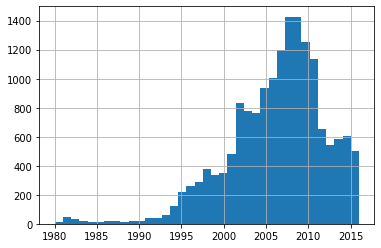

In [22]:
import matplotlib.pyplot as plt
games['year_of_release'].hist(bins=37)

Мы видим, что больше всего игр приходится на период 2005-2011 года. В 2013 году наблюдается снижение, что связано с выходом нового поколнеию консолей PS4 и XBOX One. Для целей нашего исследования не релевантными являются данные до 2000 года, т.к.малое количество наблюдений, а также тот факт, что предпочтения пользователей со временем меняются. Могли бы быть интересны данные за 2005-2011 гг. в виду большого кол-ва наблюдений, но эти данные не актуальны, т.к. это время консолей предыдущего поколения, с меньшими техническими возможностями, с другими предпочтениями геймеров.

Посмотрим, как менялись продажи по платформам. Для этого выберем наиболее популярные платформы и построим столбчатые диагараммы.

In [23]:
print(games
      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
      .sort_values(by='total_sales', ascending=False))

          total_sales
platform             
PS2           1043.09
X360           876.36
Wii            813.47
PS3            796.75
DS             743.74
PS             686.89
GBA            305.27
PS4            265.79
PSP            248.77
GB             246.27
NES            245.74
3DS            244.54
XB             243.09
PC             233.88
N64            213.70
SNES           196.82
GC             191.60
XOne           145.05
2600            85.64
WiiU            76.24
PSV             47.38
SAT             33.52
GEN             27.46
DC              15.68
SCD              1.81
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


Для начала построим график по всем данным.

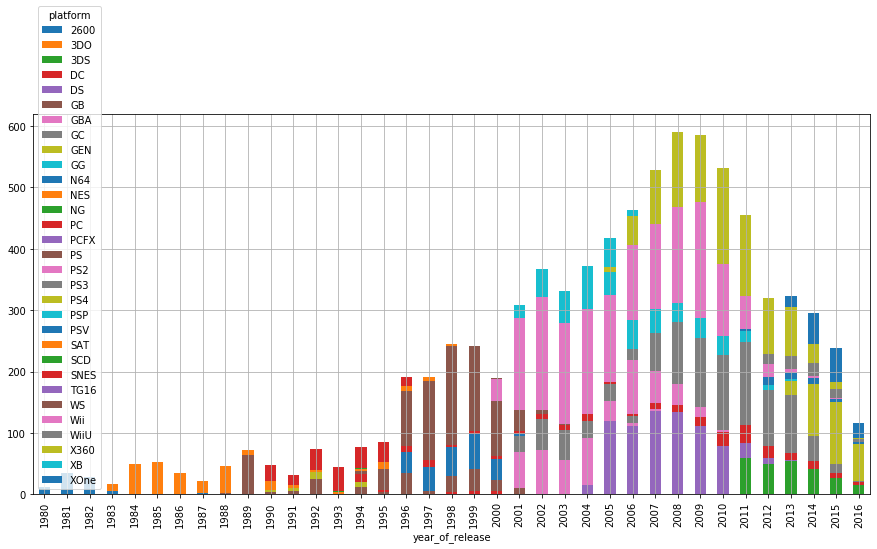

In [24]:
stat = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
stat.plot.bar(stacked=True, figsize = (15, 7), grid=True)

Диаграмма по всем данным не показательна,  выберем топ-6 платформ по продажам.

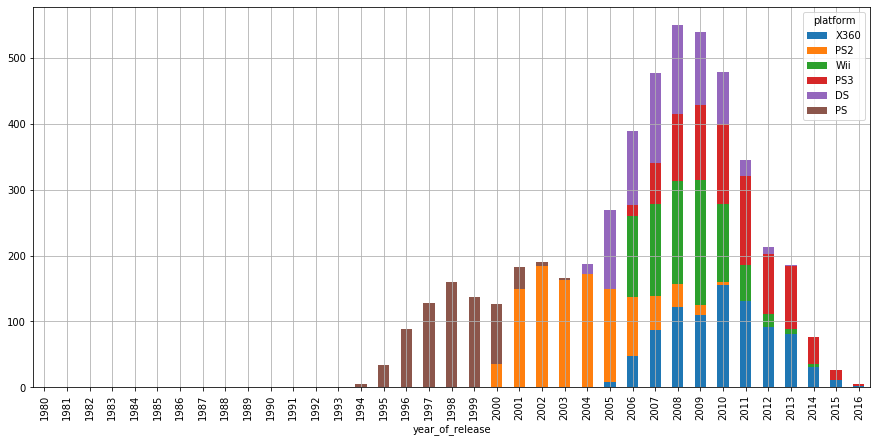

In [25]:
stat_top6 = stat[['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS']]
stat_top6.plot.bar(stacked=True, figsize = (15, 7), grid=True)

Мы видим, что жизненный цикл консолей составляет 6-8 лет. Также мы видим, что наиболее продаваемые платформы уже отжили свой жизненный цикл. Построим график для актуальных платформ. Актуальная платформа - платформа, на которой есть продажи за 2014-2016 год

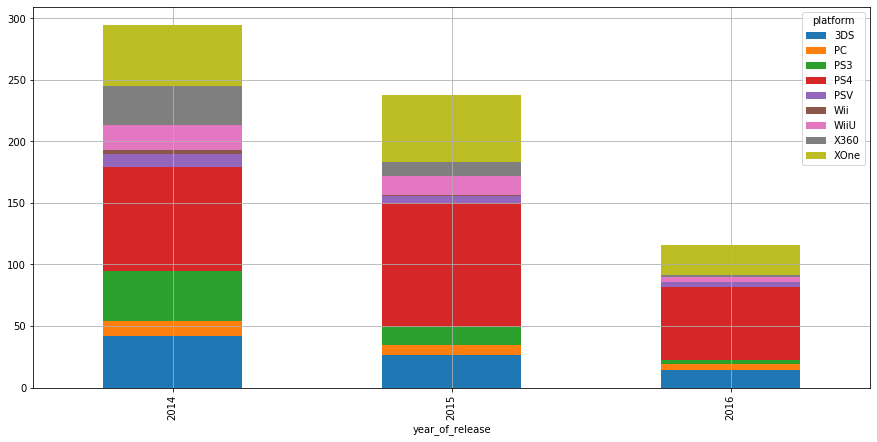

In [26]:
stat_latest = stat.query('year_of_release > 2013')
stat_latest = stat_latest.dropna(axis=1)
#print(stat_latest)
stat_latest.plot.bar(stacked=True, figsize = (15, 7), grid=True)

Мы видим, что PS и Xbox доминируеют на рынке. При этом в конце 2013 года вышло новое поколение консолей (PS4 и XOne), которое сменяет предыдущее (PS3 и X360)

Исходя из проделанного анализа можно сделать вывод, что актуальным для целей нашего исследования является период 2014-2016 гг., когда сменилось основное поколение консолей. Из исходного датасета сделаем выборку

In [27]:
games_last = games.query('year_of_release > 2013')
games_last = games_last.reset_index(drop=True)
print(games_last.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 13 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null int64
genre              1689 non-null object
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
critic_score       1689 non-null float64
user_score         1689 non-null object
rating             1689 non-null object
user_score_adj     1689 non-null float64
total_sales        1689 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 171.7+ KB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a7d584650>,
      dtype=object)

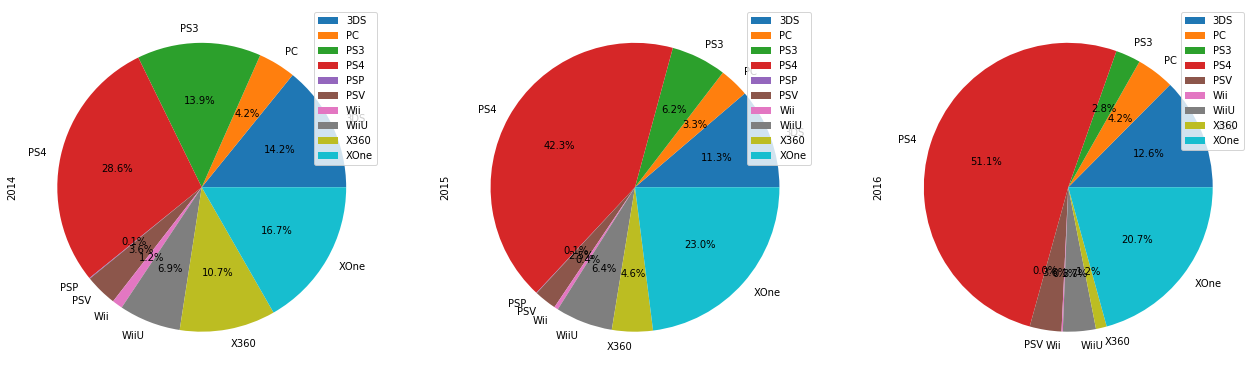

In [28]:
(games_last
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='pie', subplots=True, figsize=(22, 22), autopct='%1.1f%%')
)

Мы видим, что большинство продаж приходится на "большие" консоли, а именно, PS3/4, Xbox 360/One. Если смотреть на консоли предыдущго поколения, то доля PS3 и Xbox 360 снизилась c 13,9 до 2,8% и с 10,7 до 1,2% за период 2014-16 гг. При этом доля консолей нового поколения - PS4 Xbox One - возросла с 28,6% до 51,1% и 16,7% до 20,7% за аналогичный период. Из этих цифр можно сделать вывод, что PS4 пользуется большей популярностью нежели ее конкурент от Майкрософт. Стабильную долю держит Nintendo 3DS (сократилась с 14,2% до 12,6%). Исходя из предоставленных цифр можно сделать вывод, что наиболее перспективной платформой является PS4, с ощутим отстванием идут Xbox One и 3ds. Соответственно, на данной тройке нужно сфокурисоваться магазину.

•	Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [29]:
def boxplot (data, platform):
    data_adj = data[data['platform'] == platform]
    data_adj.boxplot(column='total_sales')
    
    info = data_adj['total_sales'].describe()
    return info

count    376.000000
mean       0.648059
std        1.358995
min        0.010000
25%        0.050000
50%        0.160000
75%        0.580000
max       12.250000
Name: total_sales, dtype: float64

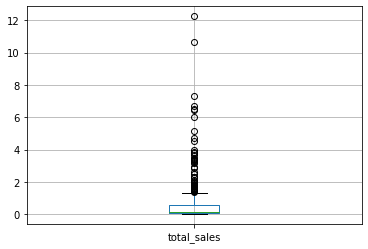

In [30]:
boxplot(games_last, 'PS4')

count    228.000000
mean       0.560702
std        0.951956
min        0.010000
25%        0.050000
50%        0.185000
75%        0.575000
max        6.710000
Name: total_sales, dtype: float64

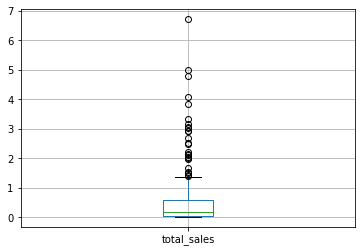

In [31]:
boxplot(games_last, 'XOne')

count    212.000000
mean       0.391509
std        1.122935
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max       10.940000
Name: total_sales, dtype: float64

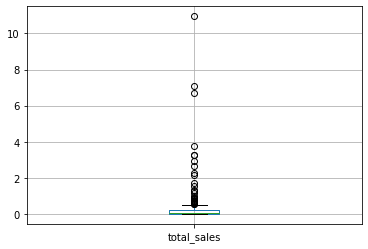

In [32]:
boxplot(games_last, '3DS')

Среднея выручка от игры минимальна на платформе 3ds (0,39 млн.долл.), платформа PS4 имеет наивысший показатель - 0,65 млн.долл, потом идет XOne c 0,56 млн.долл. за игру. ПРи этом мы видим, что распределение на XOne ближе к нормальному, т.к. большинство значений попадает в 3 межквартильных размаха, чего нельзя сказать о PS4 и 3DS.

Проанализируем, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и поссчитаем корреляцию между отзывами и продажами. 

-0.044841724222271125


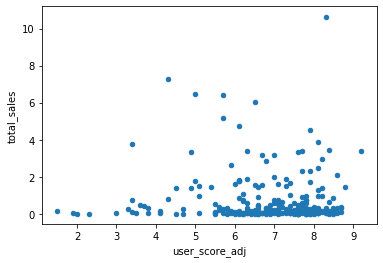

In [33]:
(games_last
 .query('user_score_adj > 0 and platform == "PS4"')
 .plot(x='user_score_adj', y='total_sales', kind='scatter')
)

games_user_score = games_last.query('user_score_adj > 0 and platform == "PS4"')
print(games_user_score['user_score_adj'].corr(games_user_score['total_sales']))


Мы видим, что взаимосвязи междлу рейтингом пользователей и продажами нет.

0.4021203477635432


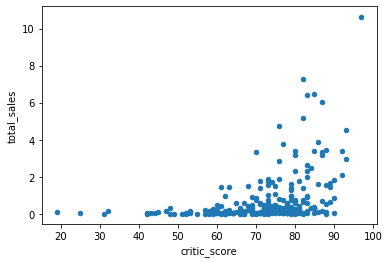

In [34]:
(games_last
 .query('critic_score > 0 and platform == "PS4"')
 .plot(x='critic_score', y='total_sales', kind='scatter')
)

games_critic_score = games_last.query('critic_score > 0 and platform == "PS4"')
print(games_critic_score['critic_score'].corr(games_critic_score['total_sales']))

Мы видим, что взаимосвязь между рейтингом критиков и продажами присутсвует, но не является сильной (коэффициент корреляции Пирснона равен 0,41)

Соотнесем выводы с продажами игр на других платформах

-0.026472065687135782


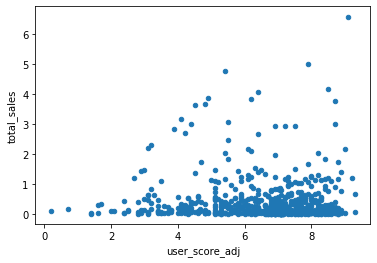

In [35]:
(games_last
 .query('user_score_adj > 0 and platform != "PS4"')
 .plot(x='user_score_adj', y='total_sales', kind='scatter')
)

games_user_score = games_last.query('user_score_adj > 0 and platform != "PS4"')
print(games_user_score['user_score_adj'].corr(games_user_score['total_sales']))

0.3084933035859711


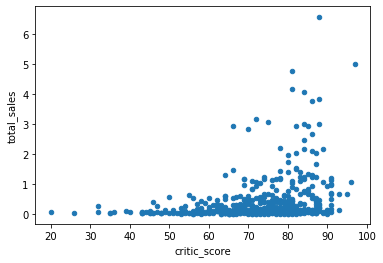

In [36]:
(games_last
 .query('critic_score > 0 and platform != "PS4"')
 .plot(x='critic_score', y='total_sales', kind='scatter')
)

games_critic_score = games_last.query('critic_score > 0 and platform != "PS4"')
print(games_critic_score['critic_score'].corr(games_critic_score['total_sales']))

Также как и для PS4, для всех остальных платформ нет никакой взаимосвязи между оценкой пользователей и продажами, но есть слабая зависимость между рейтингом критиков и продажами (0,31 что меньше аналогичного показателя для PS4).

Посмотрим на общее распределение игр по жанрам.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a7c196b10>],
      dtype=object)

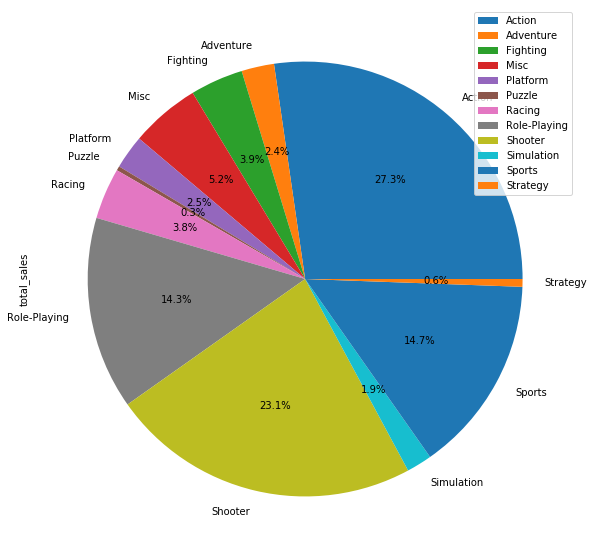

In [37]:
(games_last
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%')
)

Наиболее прибыльными жанрами являются Экшн и Шутер (27,3% и 23,1% соответственно), на них приходится половина прибыли за 2014-16 гг. Следом за ними идут спортинвые игры и РПГ (14,7% и 14,3% соответственно). На остальные жанры приходится оставшиеся 20% прибыли. Наименнее прибыльными являются пазлы и стратегии (0,3% и 0,6% соответственно).

#### Вывод
Мы проанализировали данные о продажах. Установили, что жизненный цикл платформ составляет 7-8 лет. Для целей своего исследования определили актуальный период как 2014-2016 гг. Именно эти данные помогут построить прогноз, т.к. а) они свежие; б) в концк 2013 года вышло новое поколение консолей. Все наши дальнейшие выводы строятся на данных актуального периода.

В актуальном периоде наблюдается рост доли консолей нового поколнеия от PS4 и XOne при снижении долей консолей предыдущего поколениия PS3 X360. С точки зрения роста и жизненного цикла наиболее перспективной является консоль PS4, но также стоит обратить внимание на XOne и 3ds.

Мы видим, что лидирующую позицию с точки зрения суммарной прибыли занимает PS4, при этом стоит обратить внимание, что самая высокая медианная цена у PS4 - 0,65 млн.долл., 0,56 - XOne, 0,39 - 3DS.

На продажи той или иной игры не оказывают никакого влияния оценки пользователей, при этом есть определенная не сильная зависимость между рейтингом критиков и продажами, причем у PS4 данная зависимость сильнее, чем на остальных платформах (коэффициент корреляции 0,41 у PS4 против 0,3 у XOne).

Наиболее прибыльными жанрами являются Экшн и Шутер (27,3% и 23,1% соответственно), на них приходится половина прибыли за 2014-16 гг. Следом за ними идут спортинвые игры и РПГ (14,7% и 14,3% соответственно). На остальные жанры приходится оставшиеся 20% прибыли. Наименнее прибыльными являются пазлы и стратегии (0,3% и 0,6% соответственно).

### Шаг 4

Определим самые популярные платформы (топ-5) в 3-ёх регионах - Северная Америка, Европа, Япония. Для удобства создадим функцию

In [38]:
def top5 (data, by):
    (data
     .pivot_table(index=by, values='na_sales', aggfunc='sum')
     .plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%', title='Top-5 '+by+' in Nothern America')
    )
    (data
     .pivot_table(index=by, values='eu_sales', aggfunc='sum')
     .plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%', title='Top-5 '+by+' in Europe')
    )
    (data
     .pivot_table(index=by, values='jp_sales', aggfunc='sum')
     .plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%', title='Top-5 '+by+' in Japan')
    )

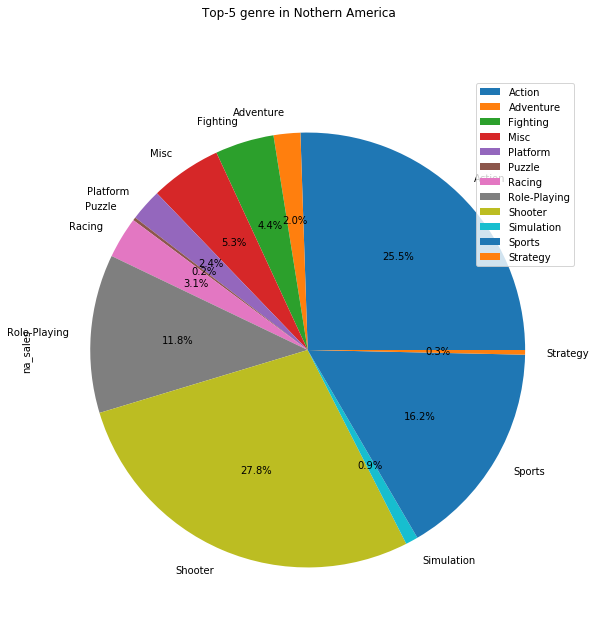

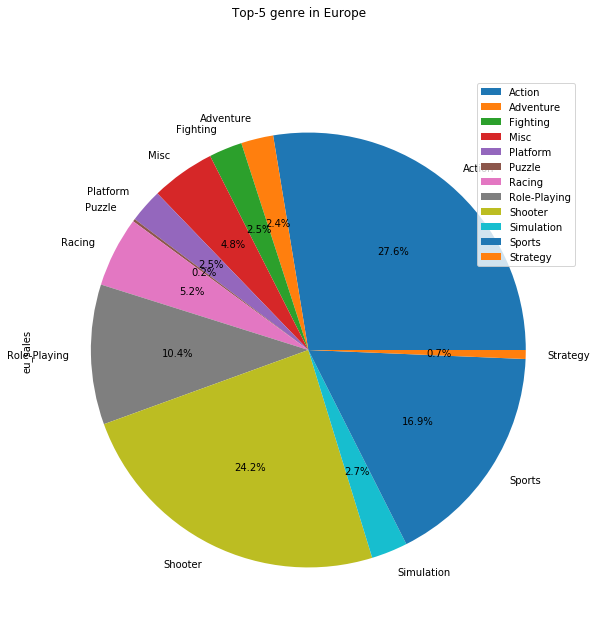

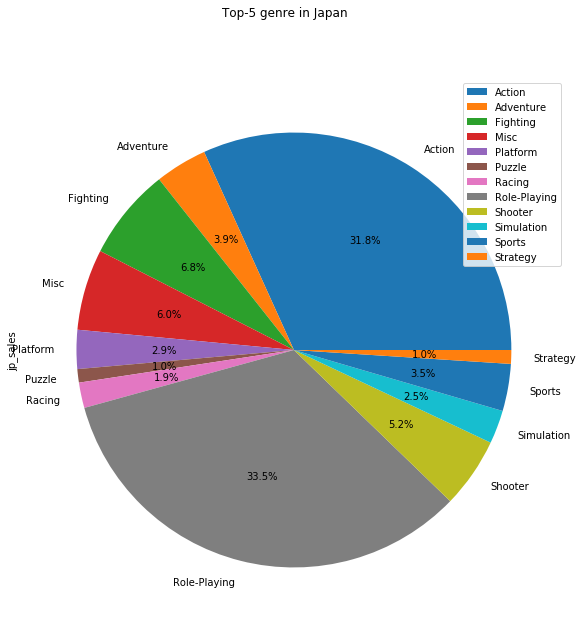

In [39]:
top5(games_last, 'genre')

В Северной Америке больше половины всей выручки приходится на жанры экшн и шутер, четверть выручки приходится на РПГ и Спорт. В Европе аналогичная ситуация. В Японии ситуация меняется - Шутеры и спорт не популярны (5,2% и 3,5% соответственно). При этом выделяется треть продаж, приходящихся на РПГ, что отличается от аналогичного показателя Северной Европы и США (10-11% выручки). Вместе с экшном доля продаж в Японии составляет 2/3 от общей выручки.

Проанлизируем самые популярные жанры (топ-5)

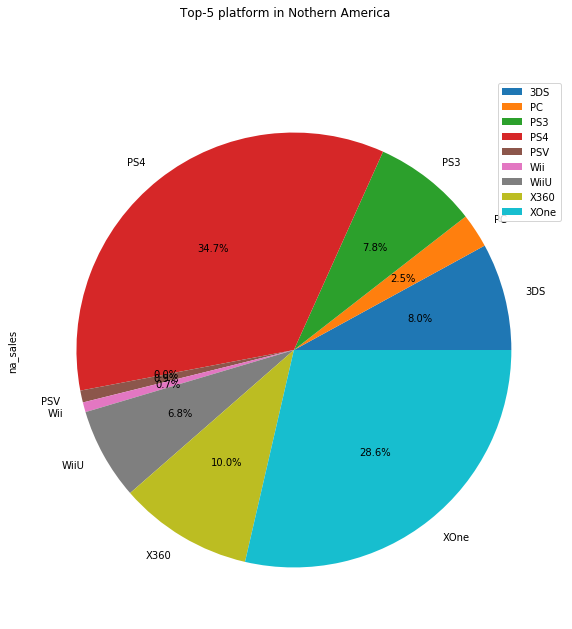

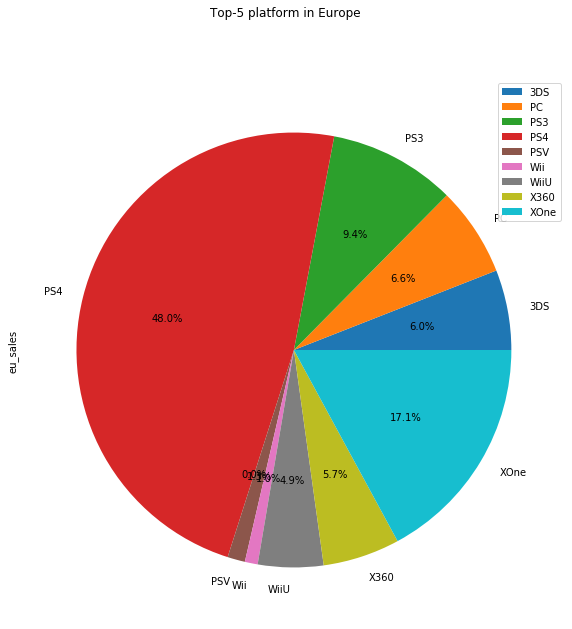

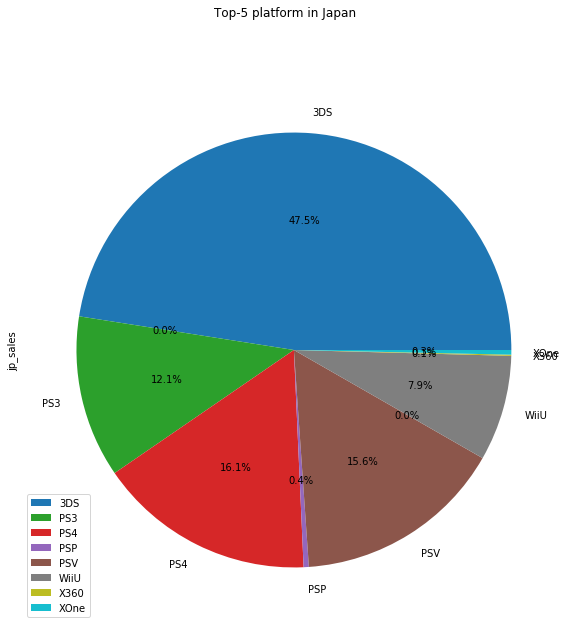

In [40]:
top5(games_last, 'platform')

Что в Северной Америке, что и в Европе преобладают консоли нового поколения PS4 и XOne (ок. 65% продаж), следом идут консоли предыдущего поколения X360 и PS4 (14-18%). При этом в европе большим спросом пользуются консоли от Sony (57,4% в Европе против 42,5% в США). В Японии картина совершенно другая. Практически никто не пользуется консолями Microsoft, очень популяны портативные платформы, которые позволяют в них играть в любом месте, не привязываясь к монитору. На такие платформы приходится порядка 70% продаж в Японии, при этом лидирует 3DS с 47,5% от общей выручки. На "старшие" платформы - консоли PS3/4 - приходится 28,2%. 

Такая разница между рынком северной Америки и Евпропы и рынком Японии обусловлена рядом особенностей, среди них:
- наличие большого ассортимента домашних производителей;
- особенности потребления контента в Японии - мобильные и портативные устройства появлялись первее; аналогично ситуации со статистикой испольования десктоп при серфинге интернета - крайне мало японцев предпочитают такой спрособ

Проанализируем, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [41]:
print(games_last['rating'].value_counts())

0       749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64


Расшифруем аббревиатуры:
- 0: заменили отсутствиующие значения рейтинга
- T: «T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 
- M: «M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- E: «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет
- E10+: «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.

Воспользуемя ранее написанной функцией.

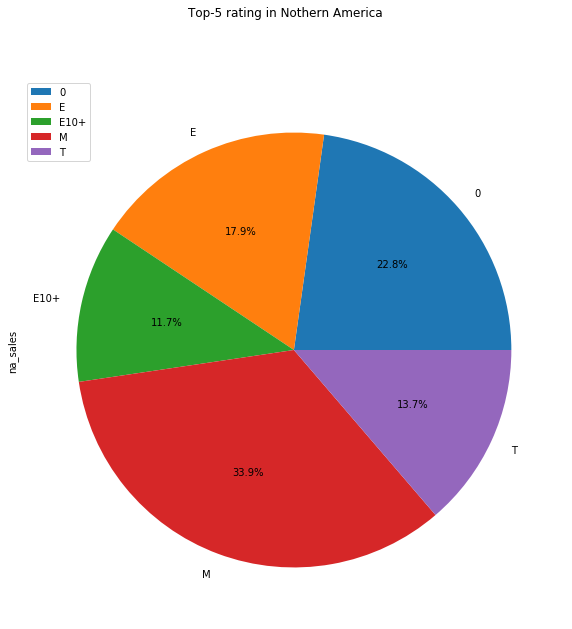

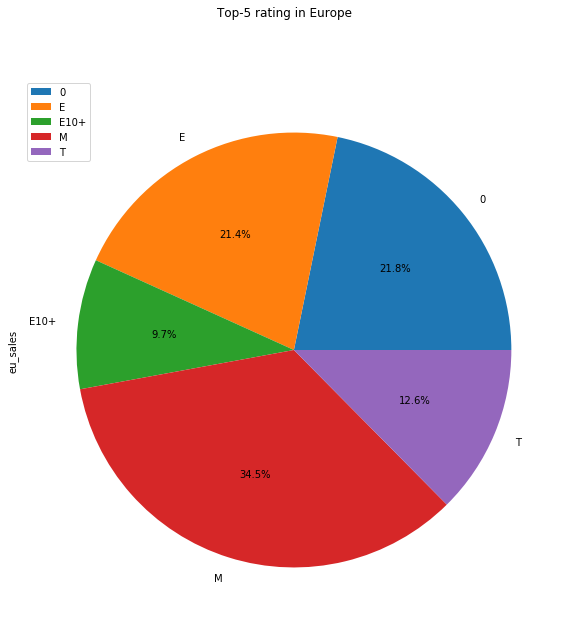

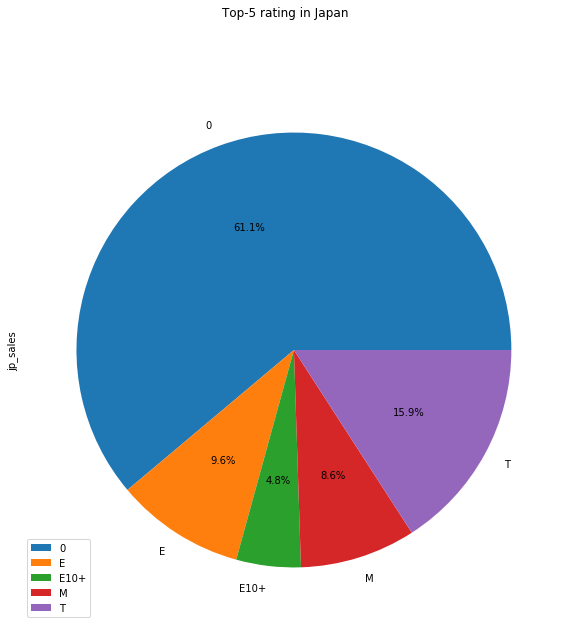

In [42]:
top5(games_last, 'rating')

Мы видим, что на рынке Северной Америки и Европы доля игр без рейтинга ESRB составляет около 21%. Треть приходится на игры с рейтингом М. Из представленных данных нельзя сделать однозначный вывод, влияет ли рейтинг ESRB на продажи, т.к. самые большие продажи приходятся на рейтинг Mature, для лиц старше 18 лет, хотя мы знаем что большая часть геймеров это дети. Для япониии райтинг ESRB вообще не играет никакой роли, т.к. данная рейтинговая шкала приеняется только для Северной Америки. Также в Японии есть ощутимая доля игр, которая выходит только в Японии и не экспортируется в другие регионы.

### Шаг 5

На данном шаге проверим два предположения:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные;

Подготовим соответствующие ряды данных для статисического анализа. Для предположения 1 подготовим два объекта series -  пользовательские оценки игр для платформ Xbox One и PC:

In [43]:
xone_score = games_last[ (games_last['user_score_adj']>0) & (games_last['platform']=='XOne') ]['user_score_adj']
#print(xone_score)
pc_score = games_last[ (games_last['user_score_adj']>0) & (games_last['platform']=='PC') ]['user_score_adj']
#print(pc_score)

Для предположения 2 подготовим два объекта series - пользовательские оценки жанров Action (англ. «действие») и Sports (англ. «виды спорта»):

In [44]:
action_score = games_last[ (games_last['user_score_adj']>0) & (games_last['genre']=='Action') ]['user_score_adj']
#print(action_score)
sports_score = games_last[ (games_last['user_score_adj']>0) & (games_last['genre']=='Sports') ]['user_score_adj']
#print(sports_score)

Для проверки обоих предположений подходит случай "проверка гипотезы о равенстве средних двух генеральных совокупностей". Т.к. обе выборки сделаны из одной совокупности, то дисперсия для этих выборок идентичная. Установим уровень значимости alpha = 0.05, т.к. для данного экперимента вероятности случайного совпадения 1/20 является приемлимой и дает достаточную уверенность, чтобы сделать вывод.

Предполжение 1:
- H0 нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1 альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [45]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
xone_score,
pc_score)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10762973197236259
Не получилось отвергнуть нулевую гипотезу


Т.к. мы не смогли отвергнуть нулевую гипотезу, то можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

Предполжение 2:
- H0 нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны;
- H1 альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [46]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
action_score,
sports_score)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.279279775741597e-23
Отвергаем нулевую гипотезу


Т.к. мы отвергли нулевую гипотезу, то можно с уверенностью утверждать, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. При этом рейтинг Action выше рейтинга Sports

In [47]:
import numpy as np
print('Средняя оценка ползователя жанра Action:', np.median(action_score))
print('Средняя оценка ползователя жанра Sports:', np.median(sports_score))

Средняя оценка ползователя жанра Action: 7.1
Средняя оценка ползователя жанра Sports: 5.5


### Шаг 6: Общий вывод

Мы прочитала датафрейм и изучили общую информацию о данных.

В результате мы подготовили данные к дальнейшему анализу. Удалили строки с пропущенными значениями в жанре и годе релиза ввиду незначительности их общего количества, изменили типы данных при необходимости. Пропуски в оценках критиков и пользователей мы не стали заменять на средние показатели, т.к. в нашем представлении это не является точным и релевантным. Также будет неправильно заменять рейтингом данной игры с другой платформы, т.к. качество портирования игры может сильно отличаться, а также на различных платформах могут разные требования со стороны пользователей и критиков. В оценках пользователей выявили оценку tbd, что означает «будет определена». Заменили ее на медианные значения для жанра и года.

Мы провели исследовательский анализ данных:
- Мы проанализировали данные о продажах. Установили, что жизненный цикл платформ составляет 7-8 лет. Для целей своего исследования определили актуальный период как 2014-2016 гг. Именно эти данные помогут построить прогноз, т.к. а) они свежие; б) в концк 2013 года вышло новое поколение консолей. Все наши дальнейшие выводы строятся на данных актуального периода.
- В актуальном периоде наблюдается рост доли консолей нового поколнеия от PS4 и XOne при снижении долей консолей предыдущего поколениия PS3 X360. С точки зрения роста и жизненного цикла наиболее перспективной является консоль PS4, но также стоит обратить внимание на XOne и 3ds.
- Мы видим, что лидирующую позицию с точки зрения суммарной прибыли занимает PS4, при этом стоит обратить внимание, что самая высокая медианная цена у PS4 - 0,65 млн.долл., 0,56 - XOne, 0,39 - 3DS.
- На продажи той или иной игры не оказывают никакого влияния оценки пользователей, при этом есть определенная не сильная зависимость между рейтингом критиков и продажами, причем у PS4 данная зависимость сильнее, чем на остальных платформах (коэффициент корреляции 0,41 у PS4 против 0,3 у XOne).
- Наиболее прибыльными жанрами являются Экшн и Шутер (27,3% и 23,1% соответственно), на них приходится половина прибыли за 2014-16 гг. Следом за ними идут спортинвые игры и РПГ (14,7% и 14,3% соответственно). На остальные жанры приходится оставшиеся 20% прибыли. Наименнее прибыльными являются пазлы и стратегии (0,3% и 0,6% соответственно).

Мы составили портрет пользователя каждого региона:
- В Северной Америке больше половины всей выручки приходится на жанры экшн и шутер, четверть выручки приходится на РПГ и Спорт. В Европе аналогичная ситуация. В Японии ситуация меняется - Шутеры и спорт не популярны (5,2% и 3,5% соответственно). При этом выделяется треть продаж, приходящихся на РПГ, что отличается от аналогичного показателя Северной Европы и США (10-11% выручки). Вместе с экшном доля продаж в Японии составляет 2/3 от общей выручки.
- Что в Северной Америке, что и в Европе преобладают консоли нового поколения PS4 и XOne (ок. 65% продаж), следом идут консоли предыдущего поколения X360 и PS4 (14-18%). При этом в европе большим спросом пользуются консоли от Sony (57,4% в Европе против 42,5% в США). В Японии картина совершенно другая. Практически никто не пользуется консолями Microsoft, очень популяны портативные платформы, которые позволяют в них играть в любом месте, не привязываясь к монитору. На такие платформы приходится порядка 70% продаж в Японии, при этом лидирует 3DS с 47,5% от общей выручки. На "старшие" платформы - консоли PS3/4 - приходится 28,2%. 
- Мы видим, что на рынке Северной Америки и Европы доля игр без рейтинга ESRB составляет около 21%. Треть приходится на игры с рейтингом М. Из представленных данных нельзя сделать однозначный вывод, влияет ли рейтинг ESRB на продажи, т.к. самые большие продажи приходятся на рейтинг Mature, для лиц старше 18 лет, хотя мы знаем что большая часть геймеров это дети. Для япониии райтинг ESRB вообще не играет никакой роли, т.к. данная рейтинговая шкала приеняется только для Северной Америки. Также в Японии есть ощутимая доля игр, которая выходит только в Японии и не экспортируется в другие регионы.

Мы проверили свои гипотезы и установили, что:
- cредние пользовательские рейтинги платформ Xbox One и PC не отличаются;
- средние пользовательские рейтинги жанров Action и Sports разные, gри этом рейтинг Action выше рейтинга Sports